Preliminaries

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

print("Hello World!")

Hello World!


In [ ]:
x = np.array([1, 2])
y = np.array([-2, 1])
a = np.dot(x, y)
print("\n",a)

b = np.linalg.norm(x) #Euclidean norm
c = np.sqrt(x[0]**2 + x[1]**2)
print("\n", b, c)

theta = np.arccos(np.dot(x,y) / (np.linalg.norm(x) * np.linalg.norm(y)))

B = np.array([[3,2,1], [2,6,5], [1,5,9]], dtype=float)
print("\n", B)
print("\n", B- B.T)

z = np.random.rand(3)
v = B @ z
print("\n", v.shape)

print("\n", z.T @ B @ z)

print("\n", np.trace(B))
print("\n", np.linalg.det(B))

D, U = np.linalg.eig(B)
print("\n", D)
print("\n", U)

print("\n", np.dot(U[:,0], U[:,1]))
print("\n", U @ U.T)


 0

 2.23606797749979 2.23606797749979

 [[3. 2. 1.]
 [2. 6. 5.]
 [1. 5. 9.]]

 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

 (3,)

 12.919667419025771

 18.0

 65.00000000000004

 [13.11766327  3.44324229  1.43909444]

 [[-0.19527095 -0.74608451  0.63657455]
 [-0.59990492 -0.42261825 -0.67934373]
 [-0.77587586  0.5145403   0.3650547 ]]

 -2.8150224912813863e-16

 [[ 1.00000000e+00 -5.55111512e-17  8.32667268e-17]
 [-5.55111512e-17  1.00000000e+00  5.55111512e-17]
 [ 8.32667268e-17  5.55111512e-17  1.00000000e+00]]


What do you observe for the last command above (i.e. print(np.dot(U[:,0], U[:,1])))? Can you formally prove that this is the result you would expect for the specific structure in the matrix B?

Because the matrix B is symmetric, its eigenvectors are orthogonal by the spectral theorem. Therefore, the dot product np.dot(U[:, 0], U[:, 1]) is 0 (or numerically very close to 0), which is exactly the expected result. The anwer is -2.8150224912813863e-16 can be shown as the expected result.


Random Numbers and Uni-variate Densities

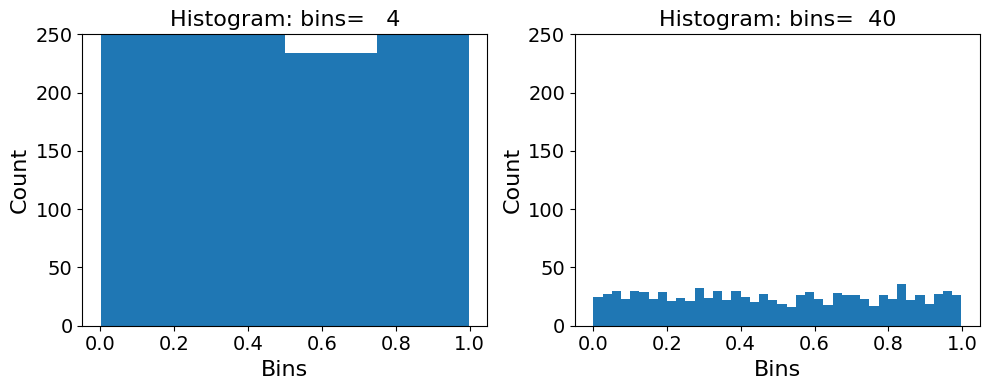

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(1000,1)
x = np.random.rand(1000,1)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
n1bins, n2bins = 4, 40
ax[0].hist(x, bins=n1bins)
ax[0].set_ylim(0,250)
ax[0].set_xlabel("Bins", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_title("Histogram: bins=%4d"%(n1bins), fontsize=16)

ax[1].hist(x, bins=n2bins)
ax[1].set_ylim(0,250)
ax[1].set_xlabel("Bins", fontsize=16)
ax[1].set_ylabel("Count", fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].set_title("Histogram: bins=%4d"%(n2bins), fontsize=16)

plt.savefig("histograms_uniform.png")
plt.tight_layout()

Though the data is from a uniform distribution, the histogram does not appear flat. Why?

Due to the inherent randomness in finite sampling, the histogram may not appear perfectly flat even though the data is derived from a uniform distribution with equally likely outcomes for each outcome in the interval [0,1] [0,1]. Sampling variability, sometimes referred to as statistical noise, can result in an uneven distribution of data across the histogram bins when only a small number of data points (such as 1000) are drawn. As a result, some bins might, just by chance, have more values than others, producing a histogram that varies around the anticipated uniform shape but does not seem to be perfectly level.


Every time you run it, the histogram looks slightly different? Why?

The code generates a fresh set of random samples from the uniform distribution each time it runs. The particular values—and thus the number of values falling into each bin—will vary from run to run because these samples are independently and randomly selected. One essential feature of stochastic processes is this variability. Because of the randomness of the sample, the histogram generated in each run will exhibit minor variations in shape even though the underlying distribution stays constant.


How do the above observations change (if so how) if you had started with more data?

The histogram will more closely resemble the actual uniform distribution if the sample size is increased (for example, from 1,000 to 10,000 or more). A smoother and more stable histogram results from the effects of sampling noise decreasing as the number of samples increases. This behavior is in line with the Law of Large Numbers, which asserts that the empirical (observed) distribution converges to the theoretical (true) distribution as sample size grows. The histogram thus becomes flatter, more consistent across runs, and more representative of the uniform distribution from which the data is taken as the amount of data increases.



(array([  2.,   3.,   9.,  22.,  35.,  48.,  69.,  95.,  98., 128., 141.,
        111.,  88.,  72.,  47.,  16.,   9.,   4.,   2.,   1.]),
 array([-4.55176846, -4.0846389 , -3.61750934, -3.15037978, -2.68325022,
        -2.21612066, -1.7489911 , -1.28186154, -0.81473198, -0.34760242,
         0.11952714,  0.5866567 ,  1.05378626,  1.52091582,  1.98804538,
         2.45517494,  2.9223045 ,  3.38943406,  3.85656362,  4.32369318,
         4.79082274]),
 <BarContainer object of 20 artists>)

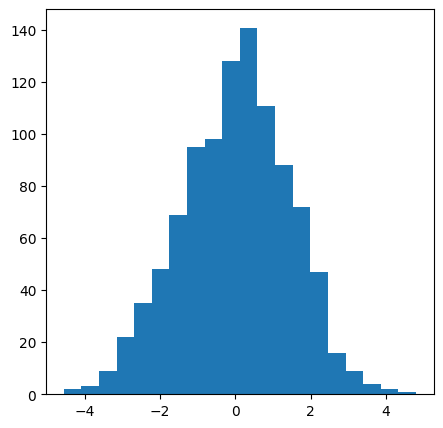

In [14]:
N = 1000
x1 = np.zeros(N)
for n in range(N):
    x1[n] = np.sum(np.random.rand(12,1))- np.sum(np.random.rand(12,1))

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(x1, 20)

What do you observe? How does the resulting histogram change when you change the number of uniform random numbers you add and subtract? Is there a theory that explains your
observation?


The histogram of their differences looks bell-shaped and resembles a normal (Gaussian) distribution, even though the data in the experiment is generated from a uniform distribution. This occurs as a result of the code adding and subtracting sums of several independent, uniform, random numbers. Because of this, the values in the x1 array are not uniformly distributed in and of themselves; rather, they are the result of combining random elements, which tends to create a distribution that centers around a mean.

The histogram gets smoother, more symmetric, and more concentrated around zero when the number of uniform random numbers used in the summation (i.e., the parameter k in np.sum(np.random.rand(k,1))) is increased. The averaging effect, which lowers variance and creates a more regular distribution, is to blame for this. On the other hand, the histogram appears more asymmetrical, has more variance, and is more irregular if the number of summed values is reduced. Therefore, the degree to which the result resembles a normal distribution directly depends on the number of components that are added or subtracted.

The Central Limit Theorem (CLT), which asserts that regardless of the initial distribution of the variables, the sum (or difference) of many independent, identically distributed random variables tends toward a normal distribution, explains this phenomenon. Here, repeated aggregation transforms the uniform distributions being summed, producing an empirical distribution that, as the number of samples increases, more closely resembles a Gaussian distribution. Consequently, the behavior of the histogram is consistent with what basic statistical theory predicts.

2 Uncertainty in Estimation

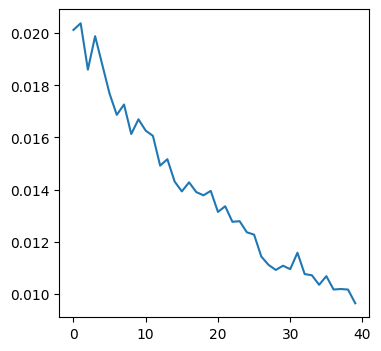

In [15]:
MaxTrial=2000
sampleSizeRange=np.linspace(100,200,40)
plotVar=np.zeros(len(sampleSizeRange))

for sSize in range(len(sampleSizeRange)):
    numSamples=int(sampleSizeRange[sSize])
    vStrial=np.zeros(MaxTrial)
    for trial in range(MaxTrial):
        xx=np.random.randn(numSamples,1)
        vStrial[trial]=np.var(xx)
    plotVar[sSize]=np.var(vStrial)

fig,ax=plt.subplots(figsize=(4,4))

ax.plot((plotVar))

3 Bi-variateGaussianDistribution

In [16]:
def gauss2D(x,m,C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num  =np.exp(-0.5 *np.dot((x-m).T,np.dot(Ci,(x-m))))
    den = 2*np.pi * dC

    return num/den
 
def twoDGaussianPlot(nx,ny,m,C):
    x=np.linspace(-5,5,nx)
    y=np.linspace(-5,5,ny)
    X,Y=np.meshgrid(x,y,indexing='ij')

    Z=np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec=np.array([X[i,j],Y[i,j]])
            Z[i,j]=gauss2D(xvec,m,C)
    return X,Y,Z

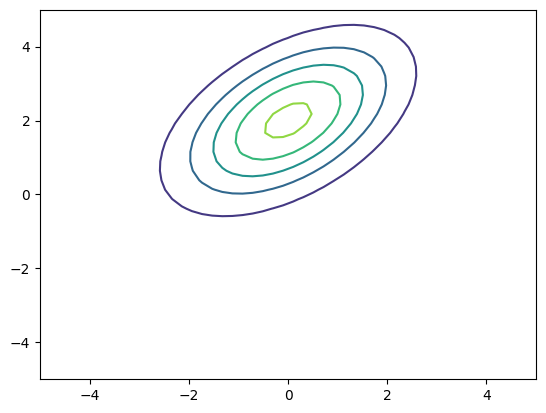

In [17]:
#Plotcontours
#
nx,ny=50,40
m1=np.array([0,2])
C1=np.array([[2,1], [1,2]],np.float32)
Xp,Yp,Zp=twoDGaussianPlot(nx,ny,m1,C1)

plt.contour(Xp,Yp, Zp,5)

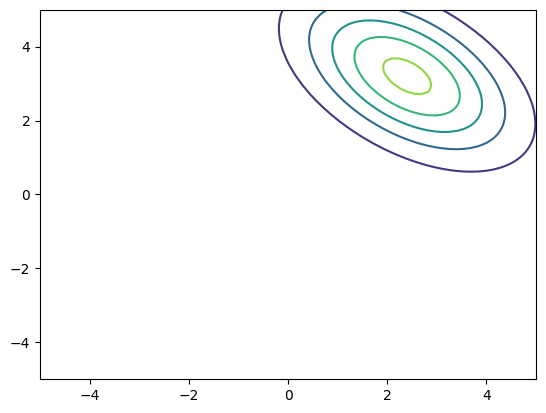

In [ ]:
#Plotcontours
#
nx,ny=50,40
m1=np.array([2.4,3.2])
C1=np.array([[2,-1], [-1,2]],np.float32)
Xp,Yp,Zp=twoDGaussianPlot(nx,ny,m1,C1)

plt.contour(Xp,Yp, Zp,5)

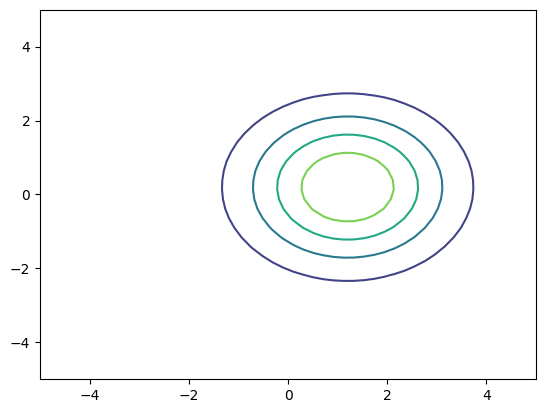

In [24]:
#Plotcontours
#
nx,ny=50,40
m1=np.array([1.2,0.2])
C1=np.array([[2,0], [0,2]],np.float32)
Xp,Yp,Zp=twoDGaussianPlot(nx,ny,m1,C1)

plt.contour(Xp,Yp, Zp,5)

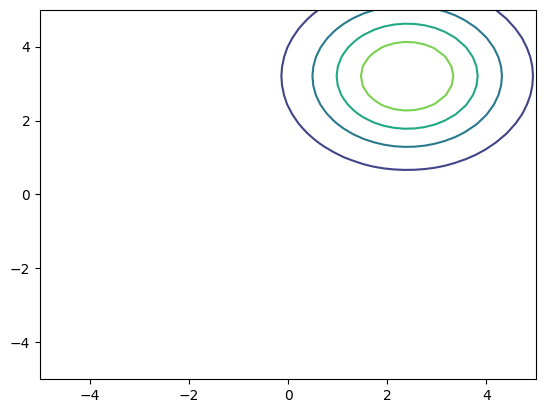

In [25]:
#Plotcontours
#
nx,ny=50,40
m1=np.array([2.4,3.2])
C1=np.array([[2,0], [0,2]],np.float32)
Xp,Yp,Zp=twoDGaussianPlot(nx,ny,m1,C1)

plt.contour(Xp,Yp, Zp,5)

4 Samplingfromamulti-variateGaussian

In [26]:
C=np.array([[2.0,1.0],[1.0,2]])
A=np.linalg.cholesky(C)
print(A@A.T)

[[2. 1.]
 [1. 2.]]


In [27]:
X=np.random.randn(1000,2)
Y=X@A
print(X.shape)
print(Y.shape)

(1000, 2)
(1000, 2)


(-6.0, 6.0)

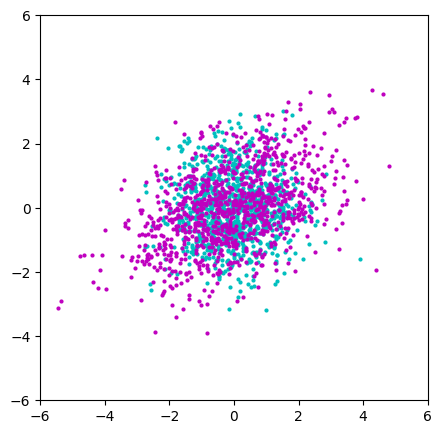

In [29]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(X[:,0],X[:,1],c="c",s=4)
ax.scatter(Y[:,0],Y[:,1],c="m",s=4)
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)

5 Distribution of Projections

In [30]:
theta = np.pi/3
u = [np.sin(theta), np.cos(theta)]
print("The vector: ", u)
print("Magnitude : ", np.sqrt(u[0]**2 + u[1]**2))
print("Angle: ", theta*180/np.pi)

The vector:  [np.float64(0.8660254037844386), np.float64(0.5000000000000001)]
Magnitude :  1.0
Angle:  59.99999999999999


In [31]:
yp = Y @ u
print(yp.shape)
print("Projected variance: ", np.var(yp))

(1000,)
Projected variance:  3.069906345496563


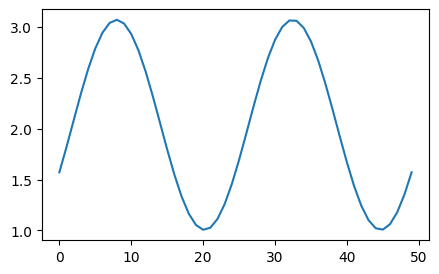

In [32]:
# Store projected variances in pVars & plot
#
nPoints = 50
pVars = np.zeros(nPoints)
thRange = np.linspace(0, 2*np.pi, nPoints)
for n in range(nPoints):
    theta = thRange[n]
    u = [np.sin(theta), np.cos(theta)]
    pVars[n] = np.var(Y @ u)

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(pVars)

What are the maxima and minima of the resulting plot?

Mamxima = 3.0
Minima = 1.0


Can you see a relationship between the eignevalues and eigenvectors and the maxima and minima of the way the projected variance changes?

To formally understand this, we compute the covariance matrix 𝐶, of the data matrix 𝑌, and then determine its eigenvalues and eigenvectors. The eigenvectors of the covariance matrix represent the directions in which the data varies the most (principal components), and the eigenvalues represent the magnitude of variance along these directions. Therefore, the maximum projected variance (peak of the plot) corresponds exactly to the largest eigenvalue, and its direction matches the corresponding eigenvector. Likewise, the minimum variance corresponds to the smallest eigenvalue and its associated eigenvector. Thus, the shape of the variance plot directly reflects the eigenspectrum of the covariance matrix.

The shape of the graph might have looked sinusoidal for this two dimensional problem. Can you analytically confirm if this might be true?

Analytically, the projected variance onto a direction vector 
u(θ)=[sin(θ),cos(θ)]T can be expressed using the quadratic form Var(uTY)=uTCu. For a symmetric 2×2 covariance matrix 𝐶, this expression expands into a trigonometric form involving cos(2θ), sin(2θ), and constant terms, which produces a sinusoidal curve with a period of π. This mathematical form confirms that the plot of projected variances versus θ in two dimensions is not only sinusoidal in appearance, but theoretically guaranteed to be sinusoidal due to the properties of quadratic forms and the orthogonality of eigenvectors in symmetric matrices.

